# Chương 6: Giải Số PTVP

In [1]:
def euler_exp(f,y0,x0,xf,N):  
    
    import numpy as np
    
    I = np.linspace(x0,xf,N) ;
    h = (xf-x0)/N ; 
       
    y_old = y0 ; y = [y0];
    
    for i in range(1,N):        
        y_new = y_old + h * f(I[i],y_old) ;  # Theo CT Euler hien: y_{i+1} = y_i + h * f(x_i, y_i)
        y_old = y_new        
        y.append(y_new)  
       
    return I, y


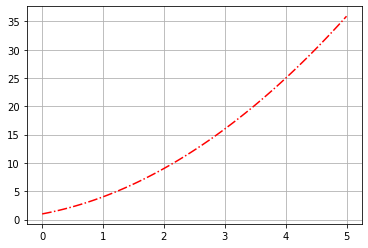

In [3]:
# Test equation: y'(x) = 2 * (x+1); y(0) = 1;   No chinh xac  la y(x) = (x+1)^2

f = lambda x, y: 2*(x+1)
y0, x0, xf, N = 1, 0, 5, 100
x, y = euler_exp(f,y0,x0,xf,N)
#x, y = euler_imp(f,y0,x0,xf,N)

import matplotlib.pyplot as plt
plt.plot(x,y,'r-.')
plt.grid()

In [9]:
def euler_imp(f,y0,x0,xf,N):  
    
    import numpy as np
    
    I = np.linspace(x0,xf,N) ;
    h = (xf-x0)/N ; 
       
    y_old = y0 ; y = [y0];
    
    for i in range(1,N):        
        # y_new = y_old + h * f(I[i],y_old) ;  # Theo CT Euler an: y_{i+1} = y_i + h * f(x_{i+1}, y_{i+1}) => Giai pt
        
        f2 = lambda y_new: y_new - y_old - h * f(I[i],y_new)
        # Neu 0 co Newton thi dung ham san co fsolve (solve, linsolve)
        from scipy.optimize import fsolve
        y_new = fsolve(f2,y_old)
        
        y_old = y_new        
        y.append(y_new)  
       
    return I, y


C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


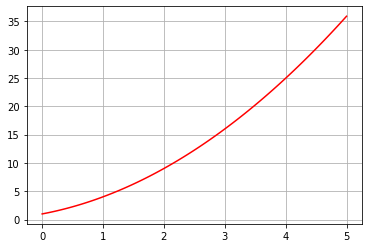

In [10]:
# Test equation: y'(x) = 2 * (x+1); y(0) = 1;   No chinh xac  la y(x) = (x+1)^2

f = lambda x, y: 2*(x+1)
y0, x0, xf, N = 1, 0, 5, 100
#x, y = euler_exp(f,y0,x0,xf,N)
x, y = euler_imp(f,y0,x0,xf,N)

import matplotlib.pyplot as plt
plt.plot(x,y,'r-')
plt.grid()

In [12]:
def midpoint_exp(f,x0,xf,y0,N):
    import numpy as np
    I = np.linspace(x0,xf,N+1) ;
    h = (xf-x0)/N ;
    
    y = [y0];    
    yi = y0 ;
    
    for i in range(N):        
        y_ip05 = yi + h/2 * f(I[i],yi) ;        
        x_ip05 = I[i] + h/2 ;        
        y_ip1 = yi + h * f(x_ip05,y_ip05) ;
        yi = y_ip1 ;          
        y.append(y_ip1)
    return I, y   

In [30]:
def Heun(f,t0,tf,x0,n):
    import numpy as np
    I = np.linspace(t0,tf,n+1) ;
    h = (tf-t0)/n ;
    x = [x0];    
    xi = x0 ;
    
    for i in range(0,n):        
        y_ip1 = xi + h * f(I[i],xi) ;
        x_ip1 = xi + h/2 * ( f(I[i],xi) + f(I[i+1],y_ip1) );
        xi = x_ip1 ;          
        x.append(x_ip1)
        #x = np.array([x, xi]);        
        
    return I, x   

In [22]:
def trap_imp(f,t0,tf,x0,n):
    import numpy as np
    from scipy.optimize import fsolve
    I = np.linspace(t0,tf,n+1) ;
    h = (tf-t0)/n ;
    x = [x0];    
    xi = x0 ;
    
    for i in range(0,n):        
        def f2(x_ip1): return x_ip1 - xi - h/2 * ( f(I[i],xi) + f(I[i+1],x_ip1) )
        x_ip1 = fsolve(f2,xi)
        #xi = x0
        xi = x_ip1 ;          
        x.append(x_ip1)
        #x = np.array([x, xi]);        
        
    return I, x    


<ipython-input-37-b2d8cebccc8b>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.semilogy(I, abs(y3 - Y), label='Trapezoid')


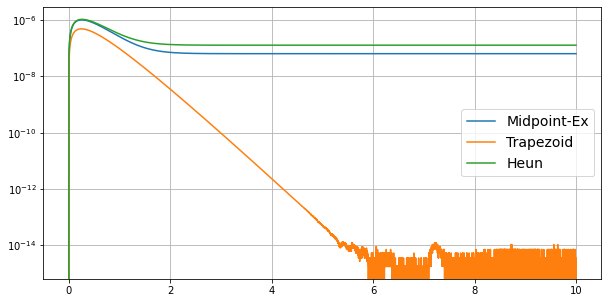

In [37]:
import numpy as np
f = lambda x, y: -4 * y + x**2
f_exact = lambda x: 31/32 * np.exp(-4*x) + x**2 / 4 - x / 8 + 1/32

x0, xf = 0, 10
h = 0.001
n = int((xf-x0) / h)
y0 = 1 

Y = f_exact(I)

I, y1 = midpoint_exp(f,x0,xf,y0,n)
I, y3 = trap_imp(f,x0,xf,y0,n)
I, y4 = Heun(f,x0,xf,y0,n)

# Plot error
plt.figure(figsize=(10, 5))

plt.semilogy(I, abs(y1 - Y), label='Midpoint-Ex')
#plt.semilogy(I, abs(y1 - Y), label='Midpoint-Im')
plt.semilogy(I, abs(y3 - Y), label='Trapezoid')
plt.semilogy(I, abs(y4 - Y), label='Heun')
plt.grid()
plt.legend(fontsize=14)